# Titanic - Feature Engineering Family Size

This time, we’ll keep things simple but slightly more meaningful than before.
Instead of just dropping Name and Ticket, we’ll create a new feature called FamilySize, which combines SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard):

$$
\text{FamilySize} = \text{SibSp} + \text{Parch} + 1
$$

This gives us an idea of whether a passenger was traveling alone or with family members, which could be correlated with survival chances.
Other than that, we’ll leave the data mostly untouched — this serves as our family-size baseline, which we’ll later compare with more advanced feature engineering versions.

In [ ]:
import os
import pandas as pd

# Load dataset
path_dir = os.path.join("..", "..", "data")
df = pd.read_csv(os.path.join(path_dir, "preprocessed", "preprocessed_train.csv"))
df_test = pd.read_csv(os.path.join(path_dir, "preprocessed", "preprocessed_test.csv"))

# Remove `Name` and `Ticket` features
# df = df.drop(['Name', 'Ticket'], axis=1)
# df_test = df_test.drop(['Name', 'Ticket'], axis=1)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

df["Large"] = (df["FamilySize"] >= 4).astype(int)
df["Medium"] = (df["FamilySize"] = 3).astype(int)
df["Small"] = (df["FamilySize"] <= 2).astype(int)

# df = df.drop(['Parch','SibSp'], axis=1)
# df_test = df_test.drop(['Parch', 'SibSp'], axis=1)

# Save file
# df.to_csv(os.path.join(path_dir, "feature_engineered", "familySize", "familySize_engineered_train.csv"), index=False)
# df_test.to_csv(os.path.join(path_dir, "feature_engineered", "familySize", "familySize_engineered_test.csv"), index=False)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Large,Medium,Small
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,0,0,1


In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Large,Medium,Small
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2,5,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2,3,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,2,0,0,1


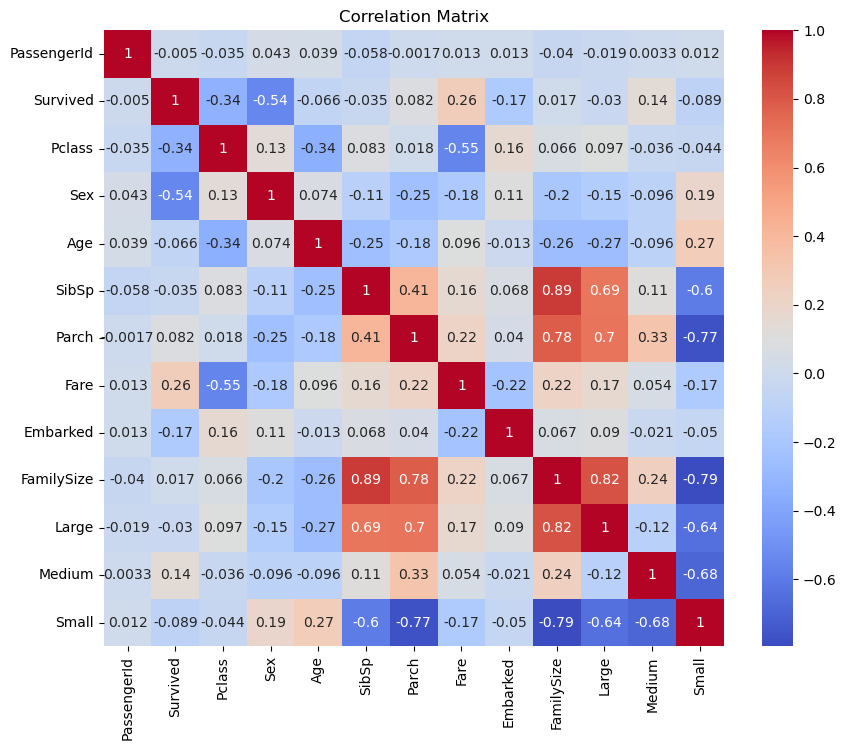

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap((df.drop(['Name', 'Ticket'], axis=1)).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()